In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

In [4]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [33]:
error_rate = 0.1
gok_rate = 2 / 23
high_rate = gok_rate + (gok_rate * error_rate)
low_rate = gok_rate - (gok_rate * error_rate)
print("gok_rate = ", gok_rate)
print("high_rate = ", high_rate)
print("low_rate = ", low_rate)

gok_rate =  0.08695652173913043
high_rate =  0.09565217391304348
low_rate =  0.07826086956521738


In [34]:
gok_rate = round(gok_rate, 3)
high_rate = round(high_rate, 3)
low_rate = round(low_rate, 3)
print("gok_rate = ", gok_rate)
print("high_rate = ", high_rate)
print("low_rate = ", low_rate)

gok_rate =  0.087
high_rate =  0.096
low_rate =  0.078


In [35]:
gokryu_frame = pd.read_excel('../output/only_gokryu_frist.xlsx')

In [36]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.50,11.40,3.70
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.40,14.30,3.80
3,A0020000009a,곡류,"귀리, 오트밀",348,64.90,13.20,8.20
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.60,11.20,1.90
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09


In [37]:
kcal = gokryu_frame['kcal']
carbohydrate = gokryu_frame['carbohydrate']
protein = gokryu_frame['protein']
fatt = gokryu_frame['fat']

In [38]:
rate = round(protein / carbohydrate , 2)

In [39]:
gokryu_frame['rate'] = rate

In [40]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat,rate
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.50,11.40,3.70,0.16
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.40,14.30,3.80,0.20
3,A0020000009a,곡류,"귀리, 오트밀",348,64.90,13.20,8.20,0.20
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.60,11.20,1.90,0.15
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09,0.17


In [41]:
fix_rate = round((rate * 100) / kcal,2)

In [42]:
gokryu_frame['fix_rate'] = fix_rate

In [43]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat,rate,fix_rate
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.50,11.40,3.70,0.16,0.05
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.40,14.30,3.80,0.20,0.06
3,A0020000009a,곡류,"귀리, 오트밀",348,64.90,13.20,8.20,0.20,0.06
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.60,11.20,1.90,0.15,0.04
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09,0.17,0.05


In [44]:
survived = []
for i,x in enumerate(rate):
#     print(i,x)
    if low_rate <= x <= high_rate:
        survived.append(1)
    else:
        survived.append(0)

In [45]:
gokryu_frame['survived'] = survived

In [46]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat,rate,fix_rate,survived
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.50,11.40,3.70,0.16,0.05,0
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.40,14.30,3.80,0.20,0.06,0
3,A0020000009a,곡류,"귀리, 오트밀",348,64.90,13.20,8.20,0.20,0.06,0
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.60,11.20,1.90,0.15,0.04,0
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09,0.17,0.05,0


In [47]:
gokryu_frame.describe()

,kcal,carbohydrate,protein,fat,rate,fix_rate,survived
count,296.000000,296.000000,296.000000,294.000000,296.000000,296.000000,296.000000
mean,303.202703,58.882061,7.042331,5.368878,0.123108,0.052365,0.202703
std,110.675489,20.487572,3.220136,7.666519,0.047910,0.046291,0.402694
min,20.000000,4.400000,0.300000,0.000000,0.030000,0.010000,0.000000
25%,230.500000,44.107500,4.900000,0.747500,0.080000,0.030000,0.000000
50%,325.000000,65.715000,6.750000,1.800000,0.120000,0.040000,0.000000
75%,365.000000,76.177500,9.100000,5.435000,0.150000,0.060000,0.000000
max,538.000000,90.980000,17.090000,33.360000,0.320000,0.450000,1.000000


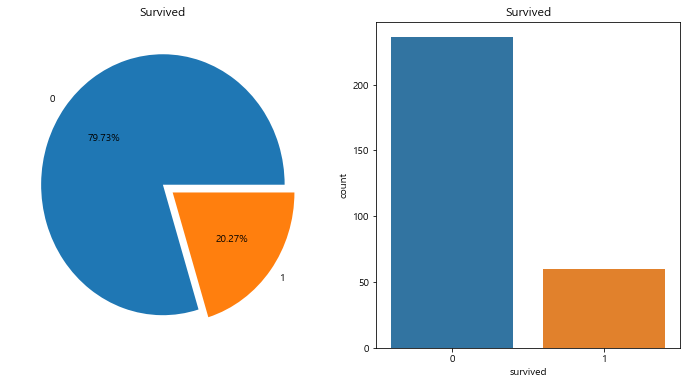

In [48]:
f,ax=plt.subplots(1,2,figsize=(12,6))

gokryu_frame['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=gokryu_frame,ax=ax[1])
ax[1].set_title('Survived')
plt.show()